In [ ]:
from google.colab import files
uploaded = files.upload()


Saving generated snow.mp4 to generated snow.mp4


In [ ]:
!pip install opencv-python


In [ ]:
pip install opencv-python opencv-python-headless


In [ ]:
import cv2
import numpy as np

def evaluate_generated_video(video_path):
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print("Error: Unable to open video.")
        return

    frame_count = 0
    temporal_diffs = []
    sharpness_values = []
    brightness_values = []

    prev_frame_gray = None

    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Temporal Consistency: Compute difference with the previous frame
        if prev_frame_gray is not None:
            diff = np.mean((gray_frame - prev_frame_gray) ** 2)
            temporal_diffs.append(diff)

        # Sharpness: Variance of Laplacian
        laplacian_var = cv2.Laplacian(gray_frame, cv2.CV_64F).var()
        sharpness_values.append(laplacian_var)

        # Brightness: Average pixel intensity
        brightness = np.mean(gray_frame)
        brightness_values.append(brightness)

        prev_frame_gray = gray_frame
        frame_count += 1

    video.release()

    # Calculate averages
    avg_temporal_diff = np.mean(temporal_diffs) if temporal_diffs else 0
    avg_sharpness = np.mean(sharpness_values) if sharpness_values else 0
    avg_brightness = np.mean(brightness_values) if brightness_values else 0

    print(f"Average Temporal Consistency (MSE between frames): {avg_temporal_diff:.4f}")
    print(f"Average Sharpness (Laplacian Variance): {avg_sharpness:.4f}")
    print(f"Average Brightness: {avg_brightness:.2f}")

# Example usage (replace with your uploaded file name)
video_path = "generated snow.mp4"
evaluate_generated_video(video_path)


Average Temporal Consistency (MSE between frames): 55.3369
Average Sharpness (Laplacian Variance): 605.9137
Average Brightness: 120.00


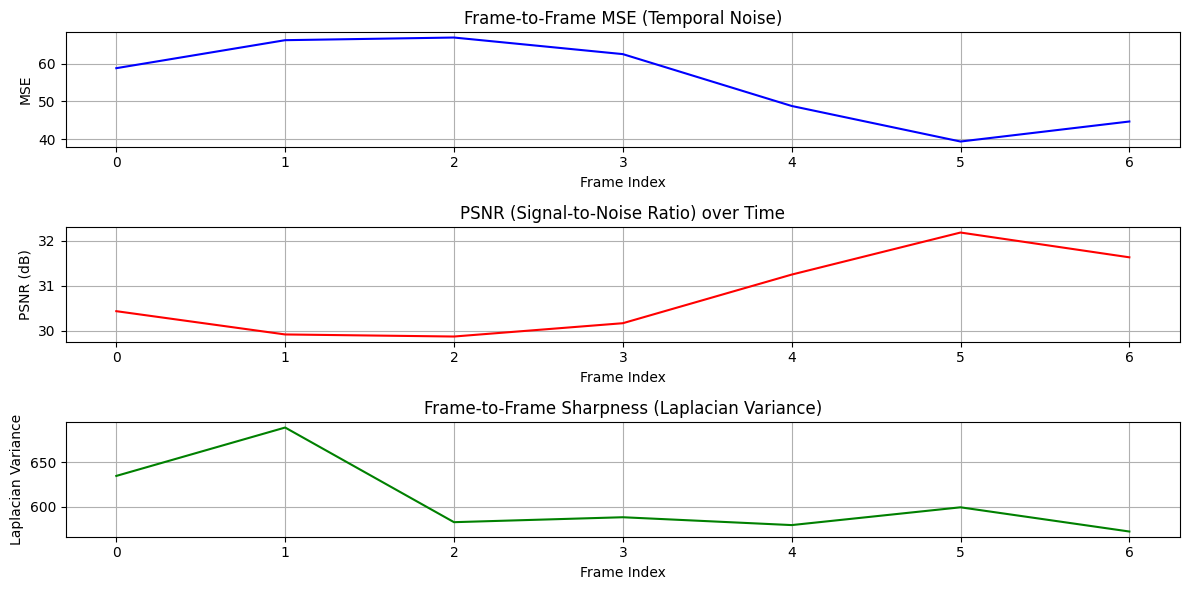

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_noise_and_plot(input_video_path):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    mse_values = []  # Store MSE values (noise) for each frame pair
    psnr_values = []  # Store PSNR values for each frame pair
    laplacian_values = []  # Store Laplacian variance (sharpness) for each frame

    ret, prev_frame = cap.read()
    if not ret:
        print("Error reading video frame")
        return

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    while True:
        ret, next_frame = cap.read()
        if not ret:
            break

        next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

        # Calculate MSE between frames (measures pixel-level noise)
        mse = np.mean((next_gray - prev_gray) ** 2)
        mse_values.append(mse)

        # Calculate PSNR (measures signal-to-noise ratio)
        psnr = 10 * np.log10(255**2 / mse) if mse != 0 else 100  # Avoid division by zero
        psnr_values.append(psnr)

        # Calculate Laplacian variance (sharpness) to measure detail preservation
        laplacian_var = cv2.Laplacian(next_gray, cv2.CV_64F).var()
        laplacian_values.append(laplacian_var)

        # Update previous frame for next iteration
        prev_gray = next_gray

    cap.release()

    # Plot the results for MSE, PSNR, and Laplacian Variance
    frame_indices = np.arange(len(mse_values))

    plt.figure(figsize=(12, 6))

    # MSE plot (Temporal Noise)
    plt.subplot(3, 1, 1)
    plt.plot(frame_indices, mse_values, label='MSE (Temporal Noise)', color='blue')
    plt.xlabel('Frame Index')
    plt.ylabel('MSE')
    plt.title('Frame-to-Frame MSE (Temporal Noise)')
    plt.grid(True)

    # PSNR plot (Signal-to-Noise Ratio)
    plt.subplot(3, 1, 2)
    plt.plot(frame_indices, psnr_values, label='PSNR (Signal-to-Noise)', color='red')
    plt.xlabel('Frame Index')
    plt.ylabel('PSNR (dB)')
    plt.title('PSNR (Signal-to-Noise Ratio) over Time')
    plt.grid(True)

    # Laplacian Variance plot (Sharpness)
    plt.subplot(3, 1, 3)
    plt.plot(frame_indices, laplacian_values, label='Laplacian Variance (Sharpness)', color='green')
    plt.xlabel('Frame Index')
    plt.ylabel('Laplacian Variance')
    plt.title('Frame-to-Frame Sharpness (Laplacian Variance)')
    plt.grid(True)

    # Show the combined plot
    plt.tight_layout()
    plt.show()

# Example usage:
input_video = 'generated snow.mp4'  # Path to your input video
calculate_noise_and_plot(input_video)
